## Customer Churn Prediction

This procjet is on predicting customer churn using the [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) data from Kaggle.

We will try to predict the customer churn using classification models such as Logistic Regression and Random Forest.

In [1]:
## first the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


## then loading and checking the dataset
data = pd.read_csv('data/Telco-Customer-Churn.csv')
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
## first checking to see if there are any null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>, <AxesSubplot:>]],
      dtype=object)

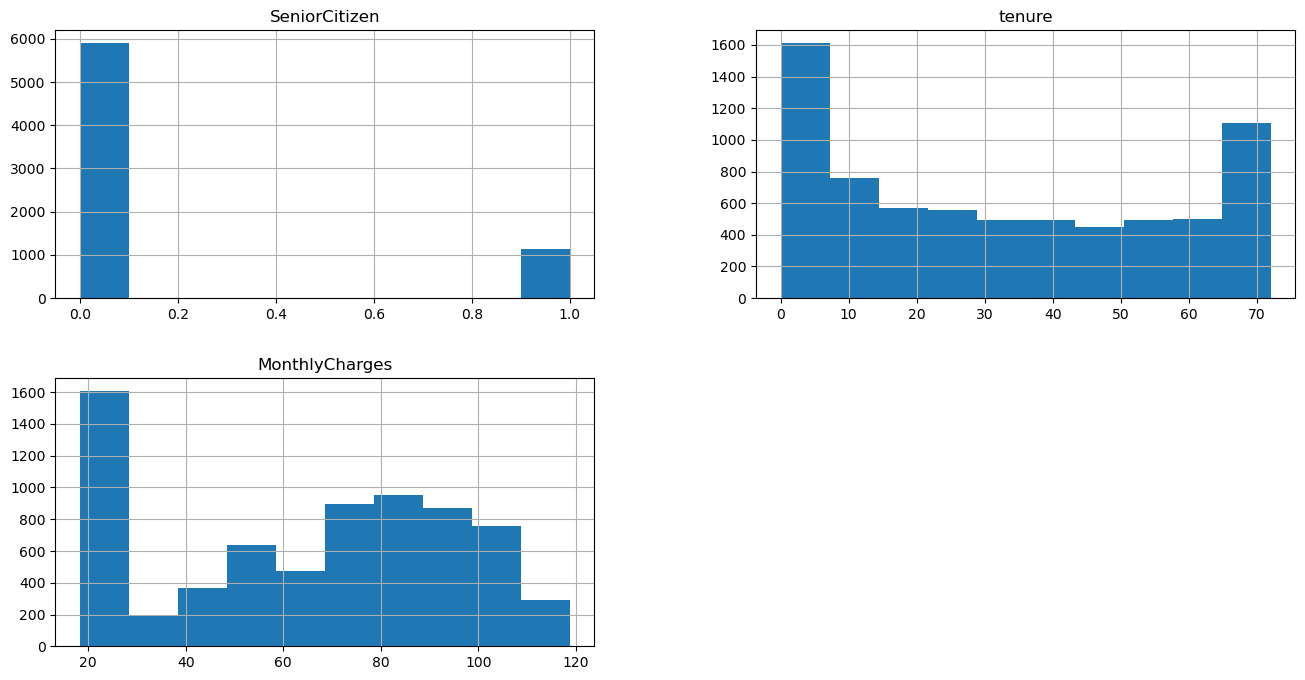

In [3]:
## then checking the overall distribution for each column
data.hist(figsize = (16, 8))

The first challenge with this data is that the majority of the columns are categorical, so the first pre-processing step is to convert them into more useful features for our model.

In [4]:
## checking the available data for the categorical columns
print(data.Dependents.value_counts())
print(data.Partner.value_counts())
print(data.PhoneService.value_counts())
print(data.MultipleLines.value_counts())
print(data.InternetService.value_counts())
print(data.OnlineSecurity.value_counts())
print(data.OnlineBackup.value_counts())
print(data.DeviceProtection.value_counts())
print(data.TechSupport.value_counts())
print(data.StreamingTV.value_counts())
print(data.StreamingMovies.value_counts())
print(data.Contract.value_counts())
print(data.PaperlessBilling.value_counts())
print(data.PaymentMethod.value_counts())

No     4933
Yes    2110
Name: Dependents, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64
No                     2785
Yes           

In [5]:
## the total charges column is stored as object
## and we have to figure out why
data.sort_values('TotalCharges').TotalCharges

936           
3826          
4380          
753           
5218          
         ...  
6646    997.75
5598     998.1
3686    999.45
3353     999.8
2845     999.9
Name: TotalCharges, Length: 7043, dtype: object

In [6]:
## for pre-processing step
## we convert all the categorical data into binary entities
data = (data
 .assign(gender=np.where(data.gender=='Female', 1, 0),
        Partner = np.where(data.Partner== 'Yes', 1, 0),
        Dependents = np.where(data.Dependents == 'Yes', 1, 0),
        PhoneService = np.where(data.PhoneService == 'Yes', 1, 0),
        MultipleLines = np.where(data.MultipleLines =='Yes', 1, 0),
        InternetService = np.where(data.InternetService=='No',0, 1),
        OnlineSecurity = np.where(data.OnlineSecurity=='Yes',1, 0),
        OnlineBackup = np.where(data.OnlineBackup=='Yes', 1, 0),
        DeviceProtection = np.where(data.DeviceProtection=='Yes', 1, 0),
        TechSupport = np.where(data.TechSupport=='Yes', 1, 0),
        StreamingTV = np.where(data.StreamingTV=='Yes', 1, 0),
        StreamingMovies = np.where(data.StreamingMovies=='Yes', 1, 0),
        PaperlessBilling = np.where(data.PaperlessBilling=='Yes', 1, 0),
        TotalCharges = data.TotalCharges.str.replace(r'\s+', '0', regex=True),
        Churn = np.where(data.Churn=='Yes', 1, 0)
        )
  .astype({'gender':'uint8', 'Partner':'uint8', 'Dependents':'uint8',
           'PhoneService':'uint8','MultipleLines':'uint8',
           'InternetService':'uint8','OnlineSecurity':'uint8',
           'OnlineBackup':'uint8','DeviceProtection':'uint8',
           'TechSupport':'uint8','StreamingTV':'uint8',
           'StreamingMovies':'uint8','PaperlessBilling':'uint8',
           'SeniorCitizen':'uint8','tenure':'int8','MonthlyCharges':'float16',
           'TotalCharges':'float16','Churn':'uint8'})
 .join(pd.get_dummies(data.Contract))
 .join(pd.get_dummies(data.PaymentMethod))
 .drop(['customerID', 'Contract', 'PaymentMethod'], axis = 1)
)
data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,1,0,1,0,1,0,0,1,0,1,...,29.84375,29.84375,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,1,0,...,56.93750,1890.00000,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,1,...,53.84375,108.12500,1,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,1,0,...,42.31250,1841.00000,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,1,0,0,...,70.68750,151.62500,1,1,0,0,0,0,1,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     7043 non-null   uint8  
 1   SeniorCitizen              7043 non-null   uint8  
 2   Partner                    7043 non-null   uint8  
 3   Dependents                 7043 non-null   uint8  
 4   tenure                     7043 non-null   int8   
 5   PhoneService               7043 non-null   uint8  
 6   MultipleLines              7043 non-null   uint8  
 7   InternetService            7043 non-null   uint8  
 8   OnlineSecurity             7043 non-null   uint8  
 9   OnlineBackup               7043 non-null   uint8  
 10  DeviceProtection           7043 non-null   uint8  
 11  TechSupport                7043 non-null   uint8  
 12  StreamingTV                7043 non-null   uint8  
 13  StreamingMovies            7043 non-null   uint8

<AxesSubplot:>

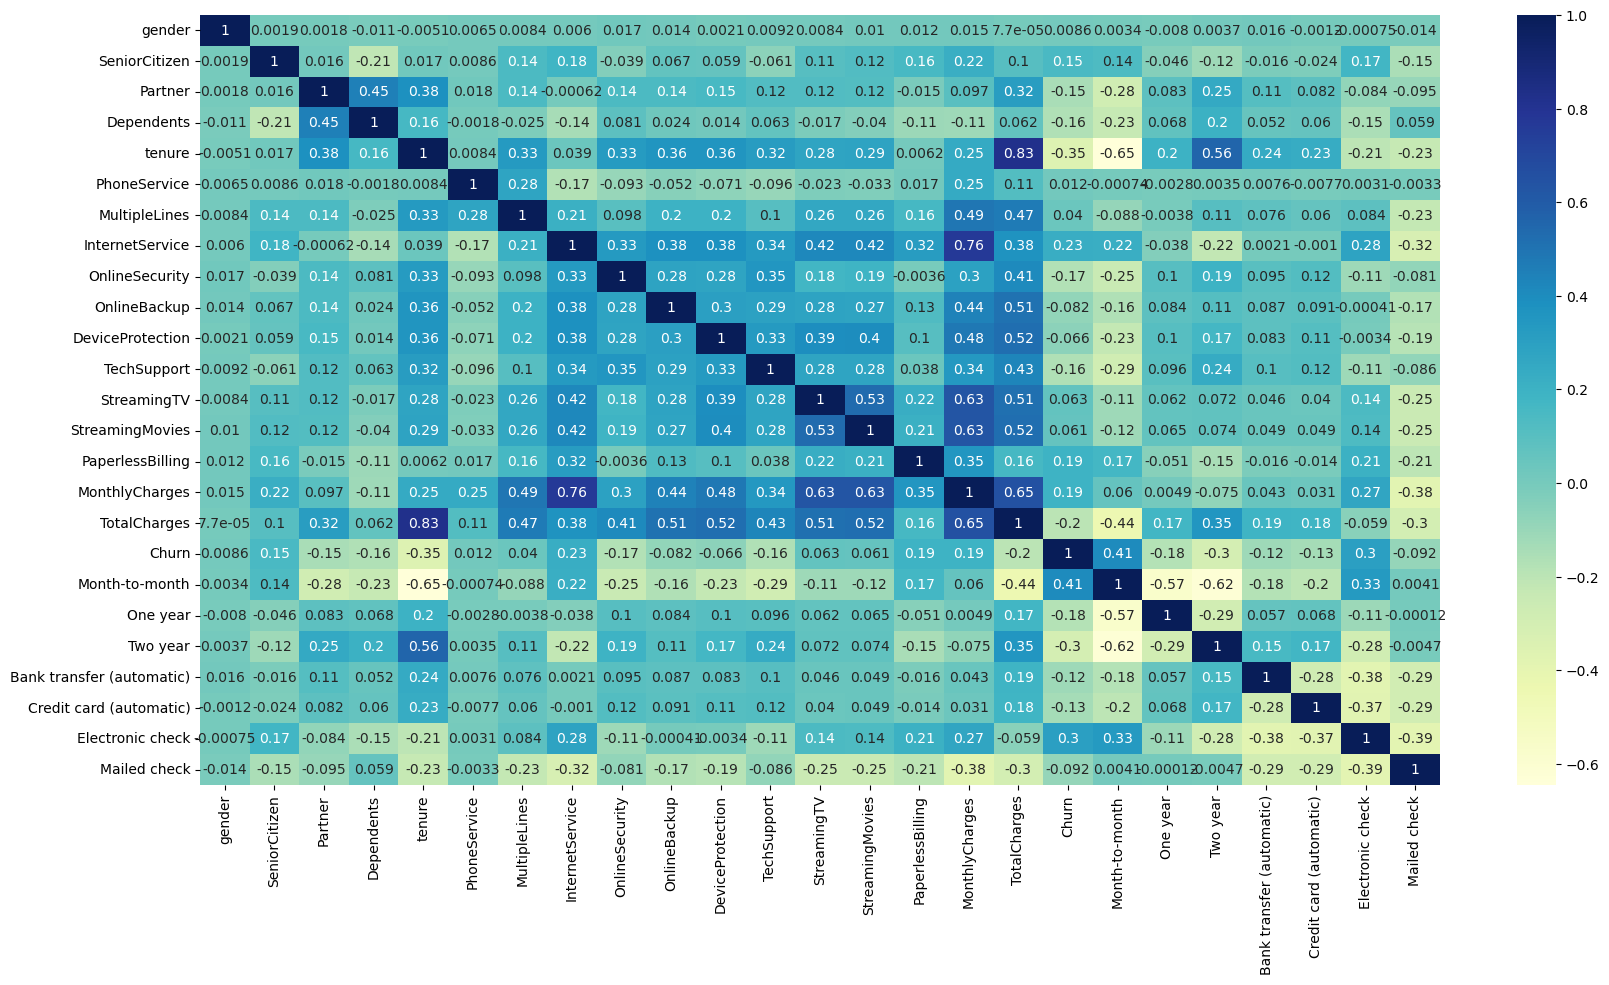

In [8]:
## and then check for correlation
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), annot=True, cmap = "YlGnBu")

### Logistic Regression Model

The first model that we'll be using is the Logistic Regression model, which is useful for binary classifications, like the one that we're working on here.

In [9]:
## first we need to create our X and Y sets
## and then split them into training and test
X = data.drop(['Churn'], axis = 1)
Y = data['Churn']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

X_train.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,MonthlyCharges,TotalCharges,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
685,1,0,0,0,1,1,0,1,0,0,...,1,49.906250,49.90625,1,0,0,0,0,1,0
338,1,0,0,0,36,1,0,1,0,1,...,1,94.812500,3566.00000,1,0,0,0,1,0,0
1865,0,1,0,0,48,1,1,1,0,1,...,1,99.000000,4744.00000,0,1,0,0,0,1,0
4218,0,0,0,0,7,1,1,0,0,0,...,1,25.046875,153.00000,1,0,0,1,0,0,0
3244,0,0,0,0,10,1,1,1,1,0,...,1,54.500000,568.00000,1,0,0,0,1,0,0


In [10]:
## now we want to initiate and test LR
lreg = LogisticRegression()
lreg.fit(X_train, Y_train)
lreg.score(X_test, Y_test)

0.7920511000709723

In [11]:
## checking if scaling the data would help the score
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.fit_transform(X_test)
## creating a fresh model
lreg = LogisticRegression()
lreg.fit(X_train_s, Y_train)
lreg.score(X_test_s, Y_test)

0.7955997161107168

### Random Forest Classification

The second model that we will be using is the Random Forest Classifier, and checking if it'll be more accurate than the Logistic Regression.

In [12]:
## we first want to check how it'll perform with the default setting
forest = RandomForestClassifier()
forest.fit(X_train_s, Y_train)
forest.score(X_test_s, Y_test)

0.7863733144073811

In [13]:
## now trying to fine tune the model by grid search
forest = RandomForestClassifier()
grid_param = {
    'n_estimators':[100, 150, 200],
    'min_samples_split':[4, 6, 8]
}
gs = GridSearchCV(forest, grid_param, cv = 5,
                 return_train_score=True,
                 scoring='neg_mean_squared_error'
                 )
gs.fit(X_train_s, Y_train)
best_forest = gs.best_estimator_
best_forest.score(X_test_s, Y_test)

0.794889992902768

### Summary

None of the models performed as well as expected, so the next steps could be to create/drop features, try other models, or fine-tune the current ones furthur.